Jupyter version of the aging scripts
Part one. Compile aging lists of genes from source files

Make nesessary preparations for the analysis of the aging data. You will need:
1. Recent python 3+ version
2. jupyter notebook
3. Source files. The files used in the paper can be found next to this script. They are all uniformly organised as tab-separated text files. Each of them contains two lines of headings. Gene names are in the second column, fold changes are in the third column. All other data are not used in current scripts.
Note that python counts from 0, therefore the second column is *col[1]*, and the 3rd column is *col[2]* if *col* stands for column name

Import necessary packages

In [1]:
import matplotlib.pyplot as plt, numpy as np, math, scipy.stats as stats 

Define directory where you keep your source files: "mdir"
List all files you will import for analysis: "sets"
Make shortlists from all signature files: "setnames"
The block below is for META-files, meaning they are derived from the supplementary files provided by authors

In [8]:
sets=["Beerman_2013.txt","Chambers_2007.txt","Flach_2014.txt","Grover_2016.txt",
    "Kirshner_2017.txt","Kowalczyk_2015.txt","Noda_2009.txt","Quere_2014.txt",
    "Rossi_2005.txt","Sun_2014.txt","Wahlestedt_2013.txt"]
setnames=[x[:-4] for x in sets]
"add  other list to the list of other files"
"extra file for DGSE plot and comparison to others"

mdir="/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/meta/"

The block below is for reanalysed files.  The structure and variable names are the same as above, therefore you can use either of those block, but not both at the same time (this is not recommended, because some of the files will be partial duplicates of itself and cause statistical bias).

In [2]:
sets=["Bersenev_GSE39553n_DE_YOn.csv","Chambers_GSE6503_YOn.csv",
    "Flach_GSE48893_YOn.csv","Grover_GSE70657_DE_OY.csv",
    "Kirshner_GSE87631_DE_OY.csv","Kowalczyk_GSE59114_DE_OY.csv",
    "Lazare_DE_YO.csv","Mann_GSE1004426_DE_OY.csv",
      "Maryanovich_GSE109546_DE_YO.csv","Norddahl_GSE27686_DE_YOn.csv",
      "Sun_GSE47817_DE_YO.csv","Wahlestedt_GSE44923_DE_YOn.csv"]
setnames=[x[:-4] for x in sets]
"add  other list to the list of other files"
"extra file for DGSE plot and comparison to others"

mdir="/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/rean/"

open every file and collect all names of genes
names is set of sets, 
fcs are fold changes per gene
allg (all genes) and 
allf (all found times) are united set with frequencies

In [3]:
names,fcs,allg,allf=[],[],[],[]
print("file\t\t\tlength\tpositive\tnegative")
for file in sets:
    f_in=open(mdir+ file,'r')
    lines=f_in.readlines()
    na,fc=[],[] #list of genes (na) and frequencies (fc) per set
    for line in lines[2:]: #skip first two lines
        items= line.rstrip().replace("'","").replace(" ","").split('\t')
        it=items[1].split('///') #for multiple gene names take the 1st
        if it[0] not in na:
            na.append(it[0]) #0 stands for the 1st column, otherwise change
            fc.append(float(items[2])) #1 stands for the second column
    #count all genes and their frequencies per publication
    for n in na:
        if n not in allg:
            allg.append(n)
            allf.append(1)
        else:
            allf[allg.index(n)]+=1
    names.append(na) #list of lists of gene names
    fcs.append(fc)  #list of lists of fold changes
    pos=[x for x in fc if x>0]
    neg=[x for x in fc if x<0]
    print(file, len(fc), len(pos), len(neg), sep="\t")
    f_in.close()

file			length	positive	negative
Bersenev_GSE39553n_DE_YOn.csv	329	234	95
Chambers_GSE6503_YOn.csv	1770	854	916
Flach_GSE48893_YOn.csv	176	50	126
Grover_GSE70657_DE_OY.csv	99	65	34
Kirshner_GSE87631_DE_OY.csv	30	21	9
Kowalczyk_GSE59114_DE_OY.csv	272	107	165
Lazare_DE_YO.csv	83	67	16
Mann_GSE1004426_DE_OY.csv	68	61	7
Maryanovich_GSE109546_DE_YO.csv	1100	549	551
Norddahl_GSE27686_DE_YOn.csv	625	438	187
Sun_GSE47817_DE_YO.csv	2622	1483	1139
Wahlestedt_GSE44923_DE_YOn.csv	313	238	75


All requred data are collected.
We can check every set name, lenth of every gene set, print first 10 names from each set
We also check for possible damage in gene names.
Some tables, when open/saved in excel loose original gene names, which became a dates, like "Mar-2", or "Sep-5". so we collect those if they are (or any other characters)

In [4]:
print("summary")
for i in range(len(sets)):
        print(sets[i],len(names[i]),names[i][:5],"...")
        mar=[x for x in names[i] if x[:4]=="Sep-"]
        if len(mar)>0:
            print("found Mar", sets[i], mar)
    

summary
Bersenev_GSE39553n_DE_YOn.csv 329 ['Mt2', 'Plscr2', 'Selp', 'Clca3a1', 'Bmpr1a'] ...
Chambers_GSE6503_YOn.csv 1770 ['Vopp1', 'Smc6', 'Prkrip1', 'Acvr2b', 'Smek2'] ...
Flach_GSE48893_YOn.csv 176 ['Gpr183', 'Socs2', 'Tdrd9', 'Ebi3', 'Fyb'] ...
Grover_GSE70657_DE_OY.csv 99 ['Erdr1', 'Xist', 'Eif2s3y', 'Mt1', 'Nupr1'] ...
Kirshner_GSE87631_DE_OY.csv 30 ['Fosb', 'Fos', 'Erdr1', 'Mt1', 'Nfkbid'] ...
Kowalczyk_GSE59114_DE_OY.csv 272 ['uc012hdk.1', 'Clca1', 'Mt1', 'Nupr1', 'Selp'] ...
Lazare_DE_YO.csv 83 ['Uhrf1', 'Ramp2', 'Vwf', 'Gria3', 'Cd34'] ...
Mann_GSE1004426_DE_OY.csv 68 ['Nupr1', 'Gda', 'Selp', 'Sult1a1', 'Clec1a'] ...
Maryanovich_GSE109546_DE_YO.csv 1100 ['Gnai3', 'Tbx4', 'Xpo6', 'Ccnd2', 'Mid2'] ...
Norddahl_GSE27686_DE_YOn.csv 625 ['Gpr183', 'Ctse', 'Eya4', 'Tc2n', 'Wwtr1'] ...
Sun_GSE47817_DE_YO.csv 2622 ['Gnai3', 'Slfn4', 'Drp2', 'Mid2', 'Tpd52l1'] ...
Wahlestedt_GSE44923_DE_YOn.csv 313 ['Sbspon', 'Osmr', 'Tc2n', 'Wwtr1', 'Pgr'] ...


Next, we collect all frequencies for all genes. 

In [5]:
allfcs=[] #all fold changes
for gene in allg:
    folds=[]
    for i in range(len(names)):
        for j in range(len(names[i])):
            if gene==names[i][j]:
                folds.append(fcs[i][j])
    allfcs.append(folds)
print("ready to make the AgingList file")

ready to make the AgingList file


Now we can save the data in the Aging List file.
Choose one of two blocks below, depending on what set of data you have used. We will save average of all fold changes.
We can also save all fold changes as a list in a separate column, if we want. To do so just add allfcs[i] as separate column in f_out.writelines() line

block below is for META data, and the list will be saved into "rean_gene_fcs_META.txt".

In [6]:
f_out=open("/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/01_Aging_List_META.txt","w")
f_out.writelines("Gene\tFreq_group\tLog2FC\n")

for i in range(len(allg)):
   # print(allg[i],allf[i], allfcs[i])
    f_out.writelines(allg[i]+"\t"+str(allf[i])+"\t"+str(sum(allfcs[i])/len(allfcs[i]))+"\n")
f_out.close()

block below is for reanalysed data, and the list will be saved into "rean_gene_fcs_REAN.txt".

In [6]:
f_out=open("/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/01_Aging_List_REAN.txt","w")
f_out.writelines("Gene\tFreq_group\tLog2FC\n")

for i in range(len(allg)):
   # print(allg[i],allf[i], allfcs[i])
    f_out.writelines(allg[i]+"\t"+str(allf[i])+"\t"+str(sum(allfcs[i])/len(allfcs[i]))+"\n")
f_out.close()
print("AgingList saved")

AgingList saved


In principle, the Aging List is the most important part of the scipt. You can stop here and proceed with the next script for further study and use of the aging signature. 
Below are some additional files which you can use if you want it.
Here is a cross-comparison of all files used for the list.

In [7]:
f_out=open("/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/02_Aging_List_META_stats.txt","w")
f_out.writelines("table of intersects\t set_size\t Intersects_tab\t all_intersected\t nr_intersected\t fraction_intersected\n")

print("table of intersects\t set_size\t Intersects_tab\t all_intersected\t nr_intersected\t fraction_intersected")
s,v,u,dists=[],[],[],[] # u for unique genes
for i in range(len(names)):
    val,uni=[],[]
    "define pos, neg"
    for j in range(len(names)):
        ovl=[x for x in names[i] if x in names[j]]
        if i!=j:
            val.append(len(ovl))
            for o in ovl:
                if o not in uni:
                    uni.append(o)
        else:
            self=len(ovl) #dirty trick for own size
            val.append(0)
    u.append(uni)
    s.append(self)
    dists.append(val)
    v.append(len(uni)) #length unique list
    f_out.writelines(sets[i]+"\t"+str(self)+"\t"+str(val)+"\t"+str(sum(val))+"\t"+str(len(uni))+"\t"+str(len(uni)/self)+"\n")
    print(sets[i],self,val,sum(val),len(uni), len(uni)/self, sep="\t")
f_out.close()

table of intersects	 set_size	 Intersects_tab	 all_intersected	 nr_intersected	 fraction_intersected
Bersenev_GSE39553n_DE_YOn.csv	329	[0, 47, 29, 31, 12, 40, 45, 23, 140, 121, 176, 111]	775	251	0.7629179331306991
Chambers_GSE6503_YOn.csv	1770	[47, 0, 32, 29, 8, 47, 17, 14, 141, 116, 174, 61]	686	356	0.20112994350282487
Flach_GSE48893_YOn.csv	176	[29, 32, 0, 12, 5, 18, 13, 9, 37, 43, 40, 29]	267	91	0.5170454545454546
Grover_GSE70657_DE_OY.csv	99	[31, 29, 12, 0, 7, 28, 14, 18, 25, 34, 31, 25]	254	66	0.6666666666666666
Kirshner_GSE87631_DE_OY.csv	30	[12, 8, 5, 7, 0, 9, 5, 5, 8, 10, 8, 9]	86	20	0.6666666666666666
Kowalczyk_GSE59114_DE_OY.csv	272	[40, 47, 18, 28, 9, 0, 15, 32, 51, 58, 70, 40]	408	132	0.4852941176470588
Lazare_DE_YO.csv	83	[45, 17, 13, 14, 5, 15, 0, 17, 56, 46, 74, 41]	343	76	0.9156626506024096
Mann_GSE1004426_DE_OY.csv	68	[23, 14, 9, 18, 5, 32, 17, 0, 33, 38, 34, 31]	254	56	0.8235294117647058
Maryanovich_GSE109546_DE_YO.csv	1100	[140, 141, 37, 25, 8, 51, 56, 33, 0, 180, 50

The table above can be presented as a heatmap below

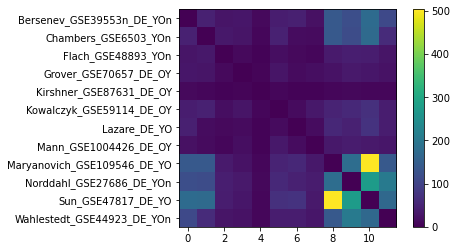

In [8]:
#heatmap figure for similarities between gene sets
plt.imshow(dists)
plt.yticks(range(len(setnames)),setnames)
plt.colorbar()
#plt.show()


Scatter plot can be skipped
At the end some summary table for each file used for the Aging List

In [9]:
#plot of gene frequencies
#plt.plot(freqs,counts, 'o-')
#plt.scatter(freqs,counts)
#plt.show()

print("make groups of genes by their frequencies of occurrence")
print("per set")
print("set\ttotal\t>3\t relative") #\t p_hypergeometric
rel_dists=[]
for val in range(len(sets)):
    total,sig=len(names[val]),0
    for name in names[val]:
        if name in allg:
            score=allf[allg.index(name)]
            if score>3:
                sig+=1
    rel_dists.append(float(sig)/float(total))
    print(sets[val], total, sig, float(sig)/float(total), sep="\t") #myp,

make groups of genes by their frequencies of occurrence
per set
set	total	>3	 relative
Bersenev_GSE39553n_DE_YOn.csv	329	130	0.3951367781155015
Chambers_GSE6503_YOn.csv	1770	71	0.04011299435028248
Flach_GSE48893_YOn.csv	176	46	0.26136363636363635
Grover_GSE70657_DE_OY.csv	99	39	0.3939393939393939
Kirshner_GSE87631_DE_OY.csv	30	12	0.4
Kowalczyk_GSE59114_DE_OY.csv	272	63	0.23161764705882354
Lazare_DE_YO.csv	83	54	0.6506024096385542
Mann_GSE1004426_DE_OY.csv	68	41	0.6029411764705882
Maryanovich_GSE109546_DE_YO.csv	1100	173	0.1572727272727273
Norddahl_GSE27686_DE_YOn.csv	625	172	0.2752
Sun_GSE47817_DE_YO.csv	2622	188	0.07170099160945843
Wahlestedt_GSE44923_DE_YOn.csv	313	155	0.4952076677316294


We can draw those results in different ways. Here is the script to make a "dart-plot"
of data sets similarity degree to the aging signature. To do so we need to use Set names, their sizes, and relative distances to the Aging Signature. Here we use the last column from the table above, namely relative values (number of genes found in signature divided by total number of genes.

In [10]:
sizes=[len(x) for x in names]
for i in range(len(sizes)):
    print(sets[i], sizes[i],rel_dists[i], sep="\t")

Bersenev_GSE39553n_DE_YOn.csv	329	0.3951367781155015
Chambers_GSE6503_YOn.csv	1770	0.04011299435028248
Flach_GSE48893_YOn.csv	176	0.26136363636363635
Grover_GSE70657_DE_OY.csv	99	0.3939393939393939
Kirshner_GSE87631_DE_OY.csv	30	0.4
Kowalczyk_GSE59114_DE_OY.csv	272	0.23161764705882354
Lazare_DE_YO.csv	83	0.6506024096385542
Mann_GSE1004426_DE_OY.csv	68	0.6029411764705882
Maryanovich_GSE109546_DE_YO.csv	1100	0.1572727272727273
Norddahl_GSE27686_DE_YOn.csv	625	0.2752
Sun_GSE47817_DE_YO.csv	2622	0.07170099160945843
Wahlestedt_GSE44923_DE_YOn.csv	313	0.4952076677316294


if sets, sizes and rel_dists are OK, we can do a little geometric exersise and draw the "dart-Plot". First, we make some scale adjustments to the data. It is needed to adjust it to the figure size

In [13]:
u,v=[],[]
size=[float(x)/10 for x in sizes]
dist=[(1-float(x))*10 for x in rel_dists]

next we use our geometric knowledge and find positions for the nodes we will draw

In [14]:
setlength=len(dist)
for i in range(setlength):
    u.append(round(math.sin(i*2*np.pi/setlength)*float(dist[i]),4))
    v.append(round(math.cos(i*2*np.pi/setlength)*float(dist[i]),4))
print(u)
print(v)

[0.0, 4.7994, 6.3968, 6.0606, 5.1962, 3.8419, 0.0, -1.9853, -7.2982, -7.248, -8.0393, -2.524]
[6.0486, 8.3129, 3.6932, 0.0, -3.0, -6.6544, -3.494, -3.4386, -4.2136, -0.0, 4.6415, 4.3716]


Now we can draw our nodes and edges. Note that colors and line thickness can be changed too

5
10
15
20


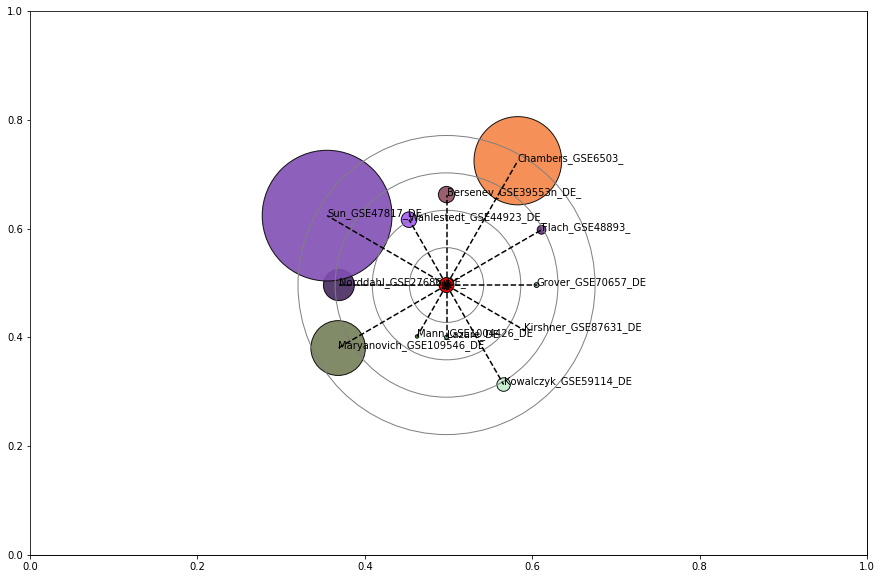

In [15]:
from matplotlib.patches import Ellipse
import numpy.random as rnd

#my struggles to control the figure size
#plt.figure(figsize=(15,5))
fig, axes= plt.subplots(nrows=1, ncols=1,figsize=(15,10))
#fig = plt.figure(0)
ax = fig.add_subplot(111)#, aspect='equal')
"draw ellipses"
for i in range(len(u)):
    ells = [Ellipse(xy=(u[i],v[i]), width=size[i]/30, height=size[i]/30,
                    facecolor=rnd.rand(3),alpha=0.9, edgecolor="black")]
    for e in ells:
        ax.add_artist(e)
"add lines"
for i in range(len(v)):
    plt.plot([0,u[i]],[0,v[i]],"--", color="black")
    plt.text(u[i],v[i],sets[i][:-7])
"add central hub"
ell=Ellipse(xy=(0,0), width=1, height=1,facecolor="red",alpha=1, edgecolor="black")
ax.add_artist(ell)

"add rings"
rings=[5,10,15,20]
for i in rings:
    print(i)
    ells = [Ellipse(xy=(0,0), width=i, height=i,
                    facecolor="none", edgecolor="grey")]
    for e in ells:
        ax.add_artist(e)
        
ax.set_xlim(min(u+v)-20, max(u+v)+20)
ax.set_ylim(min(u+v)-10, max(u+v)+10)

#ax.set_aspect(0.9) #shape of the graph rectangle
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.savefig("/Users/Art/Drive/PhD/Experiments/Aging Signature/000_FINAL/00_sourceFiles/central_hub_plot_REAN.svg",
            format='svg')

Plot visual parameters are a bit weird, but at least the size is responding. Jupyter behaves a bit unpredictable. Further adjustments are better to make in regular IDEs.
